In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from scipy import stats


In [2]:

maize_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu16_19_29_32_SeuratV4.0.1_finalclustermaize.h5ad')
arabi_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu_41_42.int_filter_recluster_final_forBen_arabi.h5ad')
maize_single_cell.var.set_index('_index', inplace= True)
arabi_single_cell.var.set_index('_index', inplace= True)

In [3]:
maize_single_cell.raw = maize_single_cell
arabi_single_cell.raw = arabi_single_cell


In [4]:
sc.set_figure_params(facecolor = 'white', figsize = (10,8))

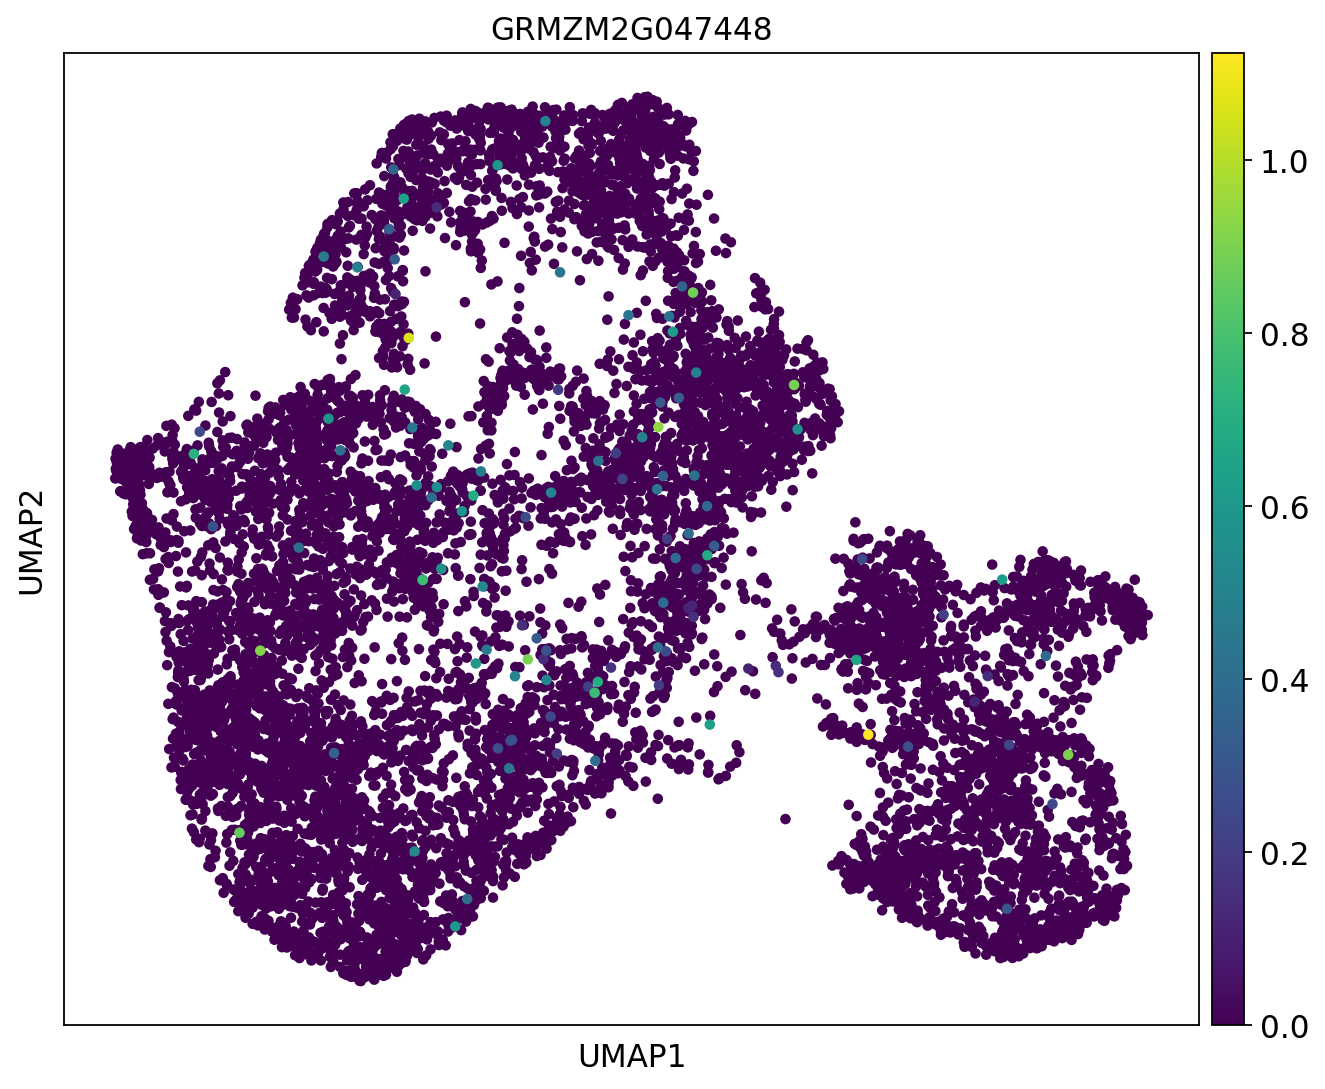

In [5]:
sc.pl.umap(maize_single_cell, color=['GRMZM2G047448'], use_raw= False, s = 90)


In [6]:
list_of_ADK_genes_in_maize = ['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767']
list_of_PFKB_genes_in_maize = ['GRMZM2G051842','GRMZM2G171400','GRMZM2G007630','GRMZM2G178346','GRMZM2G121128','GRMZM2G132607','GRMZM2G132623']

In [7]:
maize_single_cell_trimmed_to_clevata_expressing = maize_single_cell[(maize_single_cell[:,'GRMZM2G372364'].X>0), : ]
maize_single_cell_trimmed_to_clevata_expressing


View of AnnData object with n_obs × n_vars = 1191 × 28492
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features'
    obsm: 'X_umap'

In [8]:
maize_single_cell_clevata_expressing_pd = pd.DataFrame(data = maize_single_cell_trimmed_to_clevata_expressing.X.todense(), columns = maize_single_cell_trimmed_to_clevata_expressing.var.index, index = maize_single_cell_trimmed_to_clevata_expressing.obs.index)
maize_single_cell_clevata_expressing_pd

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773,GRMZM5G826672,GRMZM5G893089
AAAGAACGTTCGCGTG-1_1,0.219234,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.683343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGAACTCTTACACT-1_1,0.883206,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.387220,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGGTAGTGTTCAGT-1_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCAAGTGGGT-1_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.974519,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCAGTTAAAG-1_1,0.918607,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.918607,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAACGTCCGTACG-1_4,0.590538,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGCATTAGCTACTAC-1_4,0.618058,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGTTGTTCACCGACG-1_4,0.509567,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.509567,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTACGTCACGCGTCA-1_4,0.628428,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
clevata_expressing_cells_correlation = maize_single_cell_clevata_expressing_pd.corr(method = 'spearman')
clev_tester = clevata_expressing_cells_correlation
clevata_expressing_cells_correlation = clevata_expressing_cells_correlation.dropna(axis = 0, how = 'all')
clevata_expressing_cells_correlation = clevata_expressing_cells_correlation.dropna(axis = 1, how = 'all')
ranked_columns_clevata = clevata_expressing_cells_correlation.rank()
ranked_columns_clevata

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G332801,GRMZM2G099092,GRMZM2G404081,AC204352.3-FG012,GRMZM5G875445,GRMZM2G100873,GRMZM2G069630,GRMZM2G407631,GRMZM2G070226,GRMZM2G119305
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,26286.0,19437.0,19620.0,20310.0,9986.0,23180.0,9151.0,14825.0,25116.0,8522.0,...,21960.0,1846.0,257.5,8481.0,18778.0,5606.0,20747.0,18257.0,478.0,18803.0
GRMZM2G093344,15378.0,26286.0,4387.0,7015.5,12913.5,16583.0,3938.5,25210.0,7783.0,13447.0,...,12134.0,10763.5,12183.0,9417.5,9867.0,12889.5,10791.0,13151.0,13949.0,10420.0
GRMZM2G306216,13501.0,4051.5,26286.0,10097.5,15294.5,5183.0,6609.5,16462.0,22664.0,10138.0,...,14481.5,13193.5,14554.0,11750.5,12182.5,15309.0,13135.0,15477.0,16323.5,12725.5
GRMZM2G104572,12918.0,6194.5,9627.5,26286.0,16841.0,7092.0,8578.5,25601.0,1738.0,3101.0,...,16038.5,14800.5,16100.5,13314.0,13718.5,16886.0,14706.5,17011.5,17878.0,14264.5
GRMZM5G822187,7303.5,11523.0,14635.5,16501.0,26285.5,11915.0,13242.0,4200.0,21379.5,7435.0,...,19767.5,18628.0,19817.5,17075.0,17456.0,20614.5,18443.0,20707.5,21592.5,18016.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G100873,6129.0,11523.0,14635.5,16501.0,20572.0,11915.0,13242.0,4200.0,6049.0,7435.0,...,19767.5,18628.0,19817.5,17075.0,17456.0,26285.0,18443.0,20707.5,21592.5,18016.5
GRMZM2G069630,14416.5,11523.0,14635.5,16501.0,20572.0,11915.0,13242.0,4200.0,6049.0,25783.5,...,19767.5,18628.0,19817.5,17075.0,17456.0,20614.5,26284.5,20707.5,21592.5,18016.5
GRMZM2G407631,8835.0,11523.0,14635.5,16501.0,20572.0,11915.0,13242.0,4200.0,18705.0,26014.0,...,19767.5,18628.0,19817.5,17075.0,17456.0,20614.5,18443.0,26284.0,21592.5,18016.5


In [10]:
double_ranked_clevata = ranked_columns_clevata.rank(axis = 1)
 
normalized_clevata = double_ranked_clevata/26286

clevata_corr_results = normalized_clevata.loc[normalized_clevata.index =='GRMZM2G372364'].squeeze()

In [11]:
normalized_clevata

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G332801,GRMZM2G099092,GRMZM2G404081,AC204352.3-FG012,GRMZM5G875445,GRMZM2G100873,GRMZM2G069630,GRMZM2G407631,GRMZM2G070226,GRMZM2G119305
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,0.663642,0.671384,0.699174,0.343263,0.830632,0.319961,0.487313,0.930552,0.301225,...,0.773130,0.112969,0.015598,0.299779,0.636099,0.227402,0.718234,0.612741,0.032089,0.637145
GRMZM2G093344,0.713269,1.000000,0.183082,0.313285,0.613007,0.751864,0.159591,0.975006,0.352678,0.637716,...,0.575059,0.508217,0.578026,0.438960,0.462471,0.611866,0.509492,0.623811,0.658982,0.490223
GRMZM2G306216,0.689169,0.189112,1.000000,0.522407,0.761261,0.250609,0.326448,0.799989,0.942403,0.524709,...,0.729190,0.675987,0.732234,0.611333,0.631115,0.761793,0.673724,0.767519,0.795595,0.654303
GRMZM2G104572,0.679126,0.318725,0.512840,1.000000,0.836472,0.371757,0.455414,0.989881,0.066081,0.142814,...,0.808948,0.764019,0.811611,0.700620,0.719166,0.838165,0.759853,0.841360,0.866355,0.741992
GRMZM5G822187,0.338850,0.546413,0.680172,0.762763,0.999981,0.564768,0.621586,0.115080,0.928669,0.347010,...,0.883569,0.846192,0.885509,0.786902,0.802956,0.908925,0.839839,0.911150,0.933653,0.823708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G100873,0.253633,0.560051,0.699840,0.786502,0.927357,0.579301,0.638648,0.101879,0.248421,0.344613,...,0.905596,0.867914,0.907365,0.810793,0.825896,0.999962,0.862018,0.930552,0.950544,0.847447
GRMZM2G069630,0.623431,0.479723,0.634882,0.731796,0.895781,0.501312,0.567260,0.066119,0.181770,0.982196,...,0.869455,0.825535,0.871700,0.759321,0.777315,0.897341,0.999943,0.899471,0.923838,0.801358
GRMZM2G407631,0.429392,0.548885,0.675607,0.754946,0.898996,0.566594,0.620635,0.115232,0.837651,0.988891,...,0.873412,0.835140,0.875371,0.779103,0.794263,0.900251,0.828920,0.999924,0.924941,0.814122


In [12]:
clevata_corr_results.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/clevata_only_corr_results_maize.csv')

In [13]:
#normalized_clevata.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/coexpression_ranks_in_clevata_expressing_cells.csv')

In [14]:
clevata_corr_results[['GRMZM2G540538','GRMZM2G135132','GRMZM2G089767']]

_index
GRMZM2G540538    0.966769
GRMZM2G135132    0.270772
GRMZM2G089767    0.532584
Name: GRMZM2G372364, dtype: float64

In [15]:
clevata_corr_results[list_of_PFKB_genes_in_maize]

_index
GRMZM2G051842    0.901240
GRMZM2G171400    0.303565
GRMZM2G007630    0.422240
GRMZM2G178346    0.348075
GRMZM2G121128    0.741402
GRMZM2G132607    0.122327
GRMZM2G132623    0.478772
Name: GRMZM2G372364, dtype: float64

In [16]:
maize_single_cell_trimmed_to_wuschel_expressing_genes = maize_single_cell[(maize_single_cell[:,'GRMZM2G047448'].X>0), : ]
maize_single_cell_non_wuschel_expressing_cells = maize_single_cell[(maize_single_cell[:,'GRMZM2G047448'].X==0), : ]

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
maize_single_cell_wuschel_expressing_pd = pd.DataFrame(data = maize_single_cell_trimmed_to_wuschel_expressing_genes.X.todense(), columns = maize_single_cell_trimmed_to_wuschel_expressing_genes.var.index, index = maize_single_cell_trimmed_to_wuschel_expressing_genes.obs.index)
maize_single_cell_wuschel_expressing_pd

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773,GRMZM5G826672,GRMZM5G893089
AAAGGTAGTGTGCTTA-1_1,0.889409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.889409,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGGTCTAGTCTCTCTG-1_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATCGGCGGTGAGCGAT-1_1,0.554879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170992,0.554879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATGGGAGGTTTCACTT-1_1,0.852821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.852821,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGGAGAAAGCGATGGT-1_1,0.676593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.676593,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAACCACCCTGAG-1_4,0.549438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGACCCGTCGAAGCA-1_4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGGATGGTTAATGAG-1_4,0.716506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCAGTGTTTACTGG-1_4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.661202,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
wuschel_expressing_cells_correlation = maize_single_cell_wuschel_expressing_pd.corr(method = 'spearman')
tester_keep_seperate = wuschel_expressing_cells_correlation
wuschel_expressing_cells_correlation = wuschel_expressing_cells_correlation.dropna(axis = 0, how = 'all')
wuschel_expressing_cells_correlation = wuschel_expressing_cells_correlation.dropna(axis = 1, how = 'all')
ranked_columns_wuschel = wuschel_expressing_cells_correlation.rank()
ranked_columns_wuschel

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G104572,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G399700,GRMZM2G172183,GRMZM2G073979,...,GRMZM2G067462,GRMZM2G449796,GRMZM2G166024,GRMZM2G562681,GRMZM2G045645,GRMZM2G172386,GRMZM2G061408,GRMZM2G022958,GRMZM2G117436,GRMZM2G016346
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,23342.0,4470.0,147.0,19488.5,3585.0,22298.0,1825.0,16352.0,17137.0,5918.0,...,19054.0,19054.0,21464.5,18668.5,40.0,18668.5,2142.0,40.0,20184.0,9194.0
GRMZM2G093344,8015.0,23342.0,12627.5,13665.0,21238.0,8470.0,3946.5,5257.0,4734.0,11368.0,...,10200.5,10200.5,12969.5,11233.5,10120.0,11233.5,9579.5,10120.0,13938.5,8907.5
GRMZM2G104572,2754.0,9691.5,23337.0,18295.5,22601.0,6201.0,9991.0,10925.0,10986.5,18685.0,...,14960.0,14960.0,17746.0,16087.5,14849.5,16087.5,14415.0,14849.5,18671.5,13825.0
GRMZM2G471814,15940.0,9691.5,17397.5,23330.0,5308.0,6201.0,9991.0,10925.0,10986.5,3069.5,...,14960.0,14960.0,17746.0,16087.5,14849.5,16087.5,14415.0,14849.5,18671.5,13825.0
GRMZM2G330436,6462.0,20790.0,22507.0,6374.0,23342.0,13955.0,13557.0,21081.0,16362.0,17507.0,...,3509.0,3509.0,5436.0,4029.0,20022.5,4029.0,2956.5,20022.5,22565.5,19594.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G172386,16890.0,9691.5,17397.5,18295.5,5308.0,15978.0,9991.0,10925.0,10986.5,3069.5,...,14960.0,14960.0,17746.0,23324.0,14849.5,23324.0,14415.0,14849.5,18671.5,13825.0
GRMZM2G061408,7311.5,9691.5,17397.5,18295.5,5308.0,17403.5,9991.0,10925.0,10986.5,20316.5,...,14960.0,14960.0,17746.0,16087.5,14849.5,16087.5,23328.5,14849.5,18671.5,13825.0
GRMZM2G022958,2754.0,9691.5,17397.5,18295.5,20705.0,20753.0,23106.0,10925.0,10986.5,3069.5,...,14960.0,14960.0,17746.0,16087.5,23329.0,16087.5,14415.0,23329.0,18671.5,13825.0


In [19]:
double_ranked_wuschel = ranked_columns_wuschel.rank(axis = 1)
 
normalized_wuschel = double_ranked_wuschel/23342

wuschel_corr_results = normalized_wuschel.loc[normalized_wuschel.index =='GRMZM2G047448'].squeeze()

In [20]:
wuschel_corr_results.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/wuschel_only_corr_results_maize.csv')

In [21]:
#normalized_wuschel.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/in_wuschel_expressing_cells_correlation_ranks.csv')

In [22]:
wuschel_corr_results

_index
GRMZM2G059865    0.996573
GRMZM2G093344    0.461314
GRMZM2G104572    0.885357
GRMZM2G471814    0.953067
GRMZM2G330436    0.483463
                   ...   
GRMZM2G172386    0.298818
GRMZM2G061408    0.167638
GRMZM2G022958    0.467762
GRMZM2G117436    0.970697
GRMZM2G016346    0.055458
Name: GRMZM2G047448, Length: 23342, dtype: float64

In [23]:
cells_without_wuschel = pd.DataFrame(data = maize_single_cell_non_wuschel_expressing_cells.X.todense(), columns = maize_single_cell_non_wuschel_expressing_cells.var.index, index = maize_single_cell_non_wuschel_expressing_cells.obs.index)
cells_without_wuschel

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773,GRMZM5G826672,GRMZM5G893089
AAACCCAAGAGTCACG-1_1,1.085746,0.399053,0.0,0.0,0.0,0.0,0.0,0.000000,0.683513,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACACTGGCCA-1_1,0.976166,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.976166,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGAAAGTGCAAAT-1_1,0.516776,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.990111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGAAGTATCGTGT-1_1,1.014930,0.000000,0.0,0.0,0.0,0.0,0.0,0.631051,0.000000,0.631051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGAACAGGTGCTAG-1_1,0.588665,0.000000,0.0,0.0,0.0,0.0,0.0,0.428132,0.236805,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAACGAGC-1_4,0.367643,0.000000,0.0,0.0,0.0,0.0,0.0,0.367643,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTCAGTAGATA-1_4,0.370494,0.000000,0.0,0.0,0.0,0.0,0.0,0.370494,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCGAGTCCG-1_4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCGCTTTAT-1_4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.605682,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# non_wuschel_correlation = cells_without_wuschel.corr(method = 'spearman')
# non_wuschel_correlation

In [25]:
correlation_results = maize_single_cell_wuschel_expressing_pd.corrwith(other = maize_single_cell_wuschel_expressing_pd['GRMZM2G047448'], method = 'spearman', axis = 0)

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [26]:
correlation_results.sort_values(ascending= False).head(30)

_index
GRMZM2G047448    1.000000
GRMZM5G809695    0.400052
BIPE2            0.381660
GRMZM2G116557    0.378371
GRMZM2G470499    0.362013
GRMZM5G851769    0.349968
GRMZM2G041697    0.348527
GRMZM2G163888    0.345954
GRMZM2G088088    0.341331
GRMZM2G152908    0.339854
GRMZM2G012224    0.331489
GRMZM2G028286    0.330685
GRMZM5G835213    0.330465
RPS4             0.321462
GRMZM2G063617    0.315550
GRMZM2G138511    0.314466
GRMZM2G119852    0.314043
GRMZM2G343543    0.312103
GRMZM2G080603    0.310787
GRMZM2G112165    0.308211
GRMZM2G035017    0.307849
RPP3A            0.306487
GRMZM5G870176    0.302626
GRMZM2G086920    0.302172
GRMZM2G175419    0.296804
GRMZM2G004534    0.293838
GRMZM2G130425    0.292583
GRMZM2G115049    0.291971
GRMZM2G099355    0.288417
GRMZM2G011592    0.283906
dtype: float64

In [27]:
wuschel_corr_results[['GRMZM2G540538','GRMZM2G135132','GRMZM2G089767']]


_index
GRMZM2G540538    0.906606
GRMZM2G135132    0.595300
GRMZM2G089767    0.870919
Name: GRMZM2G047448, dtype: float64

In [28]:
wuschel_corr_results[list_of_PFKB_genes_in_maize]

_index
GRMZM2G051842    0.910419
GRMZM2G171400    0.638099
GRMZM2G007630    0.909434
GRMZM2G178346    0.585083
GRMZM2G121128    0.512274
GRMZM2G132607    0.848042
GRMZM2G132623    0.286651
Name: GRMZM2G047448, dtype: float64

In [29]:
import numpy as np    
def sparse_corr(A):
    N = A.shape[0]
    C=((A.T*A -(sum(A).T*sum(A)/N))/(N-1)).todense()
    V=np.sqrt(np.mat(np.diag(C)).T*np.mat(np.diag(C)))
    COR = np.divide(C,V+1e-119)
    return COR

In [30]:
all_cells_cells_correlation = sparse_corr(maize_single_cell.X)
all_cells_cells_correlation = pd.DataFrame(data = all_cells_cells_correlation, columns = maize_single_cell.var.index, index = maize_single_cell.var.index)
all_cells_cells_correlation


_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773,GRMZM5G826672,GRMZM5G893089
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,-0.017488,-0.020536,0.002412,0.010875,0.005277,-0.016552,-0.002723,0.025142,-0.036445,...,-0.008061,0.001892,-0.007808,-0.006972,0.011019,0.007582,-0.007020,-0.000992,0.0,0.0
GRMZM2G093344,-0.017488,1.000000,-0.003046,0.045877,0.009169,0.002507,-0.000947,0.002212,-0.020017,-0.011080,...,0.012333,0.027192,-0.002363,0.020363,-0.003666,-0.002369,-0.003063,-0.002456,0.0,0.0
GRMZM2G306216,-0.020536,-0.003046,1.000000,0.011675,-0.003964,0.022276,-0.007224,-0.006415,0.033178,0.009185,...,-0.001221,-0.001271,-0.001224,-0.001970,-0.001898,-0.001227,-0.001586,-0.001272,0.0,0.0
GRMZM2G104572,0.002412,0.045877,0.011675,1.000000,-0.002184,-0.002709,-0.003980,0.018677,-0.002594,-0.003198,...,-0.000673,-0.000700,-0.000674,-0.001086,-0.001046,-0.000676,-0.000874,-0.000701,0.0,0.0
GRMZM5G822187,0.010875,0.009169,-0.003964,-0.002184,1.000000,0.008832,-0.003357,0.015609,0.014151,-0.005331,...,-0.000568,-0.000590,-0.000569,-0.000916,-0.000882,-0.000570,-0.000737,-0.000591,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G128549,0.007582,-0.002369,-0.001227,-0.000676,-0.000570,-0.001495,-0.001039,-0.002768,-0.004741,-0.003690,...,-0.000176,-0.000183,-0.000176,-0.000283,-0.000273,1.000000,-0.000228,-0.000183,0.0,0.0
GRMZM2G450231,-0.007020,-0.003063,-0.001586,-0.000874,-0.000737,-0.001933,-0.001343,-0.003489,-0.008582,-0.002649,...,-0.000227,-0.000236,-0.000227,-0.000366,-0.000353,-0.000228,1.000000,-0.000236,0.0,0.0
GRMZM2G074773,-0.000992,-0.002456,-0.001272,-0.000701,-0.000591,-0.001550,-0.001077,-0.007172,-0.000862,-0.003825,...,-0.000182,-0.000189,-0.000182,-0.000294,-0.000283,-0.000183,-0.000236,1.000000,0.0,0.0


In [31]:
all_cells_cells_correlation = all_cells_cells_correlation.replace(0,np.NaN)
all_cells_cells_correlation

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773,GRMZM5G826672,GRMZM5G893089
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,-0.017488,-0.020536,0.002412,0.010875,0.005277,-0.016552,-0.002723,0.025142,-0.036445,...,-0.008061,0.001892,-0.007808,-0.006972,0.011019,0.007582,-0.007020,-0.000992,NaN,NaN
GRMZM2G093344,-0.017488,1.000000,-0.003046,0.045877,0.009169,0.002507,-0.000947,0.002212,-0.020017,-0.011080,...,0.012333,0.027192,-0.002363,0.020363,-0.003666,-0.002369,-0.003063,-0.002456,NaN,NaN
GRMZM2G306216,-0.020536,-0.003046,1.000000,0.011675,-0.003964,0.022276,-0.007224,-0.006415,0.033178,0.009185,...,-0.001221,-0.001271,-0.001224,-0.001970,-0.001898,-0.001227,-0.001586,-0.001272,NaN,NaN
GRMZM2G104572,0.002412,0.045877,0.011675,1.000000,-0.002184,-0.002709,-0.003980,0.018677,-0.002594,-0.003198,...,-0.000673,-0.000700,-0.000674,-0.001086,-0.001046,-0.000676,-0.000874,-0.000701,NaN,NaN
GRMZM5G822187,0.010875,0.009169,-0.003964,-0.002184,1.000000,0.008832,-0.003357,0.015609,0.014151,-0.005331,...,-0.000568,-0.000590,-0.000569,-0.000916,-0.000882,-0.000570,-0.000737,-0.000591,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G128549,0.007582,-0.002369,-0.001227,-0.000676,-0.000570,-0.001495,-0.001039,-0.002768,-0.004741,-0.003690,...,-0.000176,-0.000183,-0.000176,-0.000283,-0.000273,1.000000,-0.000228,-0.000183,NaN,NaN
GRMZM2G450231,-0.007020,-0.003063,-0.001586,-0.000874,-0.000737,-0.001933,-0.001343,-0.003489,-0.008582,-0.002649,...,-0.000227,-0.000236,-0.000227,-0.000366,-0.000353,-0.000228,1.000000,-0.000236,NaN,NaN
GRMZM2G074773,-0.000992,-0.002456,-0.001272,-0.000701,-0.000591,-0.001550,-0.001077,-0.007172,-0.000862,-0.003825,...,-0.000182,-0.000189,-0.000182,-0.000294,-0.000283,-0.000183,-0.000236,1.000000,NaN,NaN


In [32]:

all_cells_cells_correlation = all_cells_cells_correlation.dropna(axis = 0, how = 'all')
all_cells_cells_correlation = all_cells_cells_correlation.dropna(axis = 1, how = 'all')
ranked_columns_all_cells = all_cells_cells_correlation.rank()
ranked_columns_all_cells

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G152857,GRMZM2G432846,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,28435.0,696.0,2853.0,20740.0,25269.0,19146.0,1640.0,8299.0,21917.0,1597.0,...,24580.0,3633.0,1854.0,22747.0,1802.0,3729.0,25760.0,25258.0,2322.0,14550.0
GRMZM2G093344,5910.0,28435.0,13201.0,28331.0,24684.0,17421.0,16464.0,12078.0,5529.0,5984.0,...,13070.0,9030.0,26653.0,28123.0,11261.0,27585.0,7532.0,9786.0,8949.0,9465.0
GRMZM2G306216,5075.0,10877.0,28435.0,25102.0,9832.0,25914.0,6487.0,5623.0,23509.0,18462.0,...,16480.0,12716.0,15549.0,14333.0,14871.0,12129.0,11791.0,13548.0,13051.0,13277.0
GRMZM2G104572,14966.0,28359.0,22246.0,28435.0,13366.0,11769.0,10277.0,23603.0,12481.0,11696.0,...,19053.0,15457.0,18239.0,17063.0,17536.0,15097.0,14847.0,16302.0,16013.0,16098.0
GRMZM5G822187,18464.0,22041.0,11917.0,13789.0,28435.0,21131.0,11227.0,21950.0,19089.0,9654.0,...,19714.0,16177.0,18933.0,17772.0,18219.0,15845.0,15620.0,17024.0,16768.0,16824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G061499,10296.0,26726.0,14985.0,16809.0,17240.0,12318.0,14586.0,9528.0,11394.0,9144.0,...,22072.0,18625.0,21356.0,20221.0,20648.0,28435.0,18234.0,19504.0,19374.0,19382.0
GRMZM2G071924,18511.0,9912.0,15127.0,16941.0,17366.0,12476.0,14736.0,8966.0,10583.0,9344.0,...,22177.0,18739.0,21466.0,20328.0,20758.0,18525.0,28435.0,19610.0,19488.0,19493.0
GRMZM2G128549,17227.0,12096.0,16562.0,18314.0,18698.0,14105.0,16240.0,8263.0,11533.0,11292.0,...,23304.0,19894.0,22610.0,21468.0,21893.0,19736.0,19544.0,28435.0,20675.0,20672.0


In [33]:
double_ranked_all_cells = ranked_columns_all_cells.rank(axis = 1)
double_ranked_all_cells 

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G152857,GRMZM2G432846,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,28435.0,1448.5,6408.5,17414.0,21924.0,16268.5,4110.5,11033.5,18409.0,4019.5,...,21058.0,7494.5,4580.0,19161.5,4447.5,7599.0,22578.5,21908.0,5511.0,13871.5
GRMZM2G093344,3550.5,28435.0,13810.0,28394.5,26813.0,19495.0,18181.5,12293.5,3133.0,3651.0,...,13634.0,7891.0,27728.0,28282.5,11163.0,28064.0,5718.0,9019.5,7765.5,8546.0
GRMZM2G306216,5425.0,13379.5,28435.0,26442.0,12040.5,27124.5,7619.5,6302.5,24801.5,20689.0,...,19265.0,15663.0,18586.5,17510.5,17984.0,14953.5,14567.5,16668.0,16064.0,16335.0
GRMZM2G104572,18556.5,28379.0,26366.0,28435.0,15726.5,12932.0,10371.5,27085.0,14194.0,12793.5,...,24033.0,19378.5,23200.5,21777.0,22379.0,18770.0,18359.5,20709.5,20245.5,20398.0
GRMZM5G822187,23800.5,26526.5,12510.5,16161.0,28435.0,25989.5,11169.0,26471.5,24456.0,8249.5,...,24992.5,20561.5,24299.0,22973.0,23528.5,19986.5,19637.5,21946.0,21526.0,21620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G061499,6798.0,28102.0,16519.0,20362.5,21260.0,10684.5,15635.5,5547.5,8807.5,4972.5,...,26939.0,23594.0,26540.0,25643.5,26009.0,28435.0,22990.5,24862.0,24683.5,24693.5
GRMZM2G071924,23434.5,5482.0,16442.0,20394.0,21289.0,10548.5,15619.0,3988.5,6616.0,4572.0,...,27249.0,23829.0,26898.0,25975.0,26396.0,23465.5,28435.0,25144.5,24952.0,24961.0
GRMZM2G128549,20187.0,9084.0,18815.5,22314.0,23042.0,13432.0,18133.0,2326.5,7910.5,7438.5,...,27691.0,24947.5,27419.0,26697.0,27022.0,24730.0,24468.5,28435.0,25939.5,25934.5


In [34]:
normalized_all_cells = double_ranked_all_cells/28435
normalized_all_cells

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G152857,GRMZM2G432846,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,0.050941,0.225374,0.612414,0.771022,0.572129,0.144558,0.388025,0.647406,0.141357,...,0.740566,0.263566,0.161069,0.673870,0.156409,0.267241,0.794039,0.770459,0.193810,0.487832
GRMZM2G093344,0.124864,1.000000,0.485669,0.998576,0.942958,0.685599,0.639406,0.432337,0.110181,0.128398,...,0.479480,0.277510,0.975136,0.994637,0.392580,0.986953,0.201090,0.317197,0.273097,0.300545
GRMZM2G306216,0.190786,0.470529,1.000000,0.929910,0.423439,0.953912,0.267962,0.221646,0.872217,0.727589,...,0.677510,0.550835,0.653649,0.615808,0.632460,0.525884,0.512309,0.586179,0.564938,0.574468
GRMZM2G104572,0.652594,0.998031,0.927238,1.000000,0.553068,0.454792,0.364744,0.952523,0.499174,0.449921,...,0.845191,0.681502,0.815913,0.765852,0.787023,0.660102,0.645666,0.728310,0.711992,0.717355
GRMZM5G822187,0.837014,0.932882,0.439968,0.568349,1.000000,0.913997,0.392791,0.930948,0.860067,0.290118,...,0.878934,0.723105,0.854545,0.807913,0.827449,0.702884,0.690610,0.771795,0.757025,0.760331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G061499,0.239072,0.988289,0.580939,0.716107,0.747670,0.375752,0.549868,0.195094,0.309742,0.174873,...,0.947389,0.829752,0.933357,0.901829,0.914683,1.000000,0.808528,0.874345,0.868068,0.868419
GRMZM2G071924,0.824143,0.192791,0.578231,0.717215,0.748690,0.370969,0.549288,0.140267,0.232671,0.160788,...,0.958291,0.838017,0.945947,0.913487,0.928293,0.825233,1.000000,0.884280,0.877510,0.877827
GRMZM2G128549,0.709935,0.319465,0.661702,0.784737,0.810339,0.472376,0.637700,0.081818,0.278196,0.261597,...,0.973835,0.877352,0.964269,0.938878,0.950308,0.869703,0.860506,1.000000,0.912238,0.912063


In [35]:
#normalized_all_cells.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/normalized_corexpresion_ranks_in_all_cells.csv')

In [36]:
all_cells_results = normalized_all_cells.loc[normalized_all_cells.index =='GRMZM2G047448'].squeeze()

In [37]:
all_cells_results[list_of_PFKB_genes_in_maize]

_index
GRMZM2G051842    0.547758
GRMZM2G171400    0.811166
GRMZM2G007630    0.748620
GRMZM2G178346    0.226130
GRMZM2G121128    0.551679
GRMZM2G132607    0.101811
GRMZM2G132623    0.726710
Name: GRMZM2G047448, dtype: float64

In [38]:
all_cells_results[['GRMZM2G540538','GRMZM2G135132','GRMZM2G089767']]

_index
GRMZM2G540538    0.096430
GRMZM2G135132    0.615826
GRMZM2G089767    0.919043
Name: GRMZM2G047448, dtype: float64

In [39]:
clevata_7_maize_results = normalized_all_cells.loc[normalized_all_cells.index =='GRMZM2G372364'].squeeze()

In [40]:
cle

NameError: name 'cle' is not defined

In [ ]:
clevata_7_maize_results[list_of_PFKB_genes_in_maize]

_index
GRMZM2G051842    0.840672
GRMZM2G171400    0.942202
GRMZM2G007630    0.456058
GRMZM2G178346    0.834271
GRMZM2G121128    0.563390
GRMZM2G132607    0.350870
GRMZM2G132623    0.343046
Name: GRMZM2G372364, dtype: float64

In [ ]:
clevata_7_maize_results[['GRMZM2G540538','GRMZM2G135132','GRMZM2G089767']]

_index
GRMZM2G540538    0.915562
GRMZM2G135132    0.219290
GRMZM2G089767    0.706875
Name: GRMZM2G372364, dtype: float64

In [ ]:
import CococoNet_reader

In [ ]:
maize_cococonet = CococoNet_reader.read_cococonet('maize')
arabi_cococonet = CococoNet_reader.read_cococonet('arabidopsis')


In [ ]:
egad_df = pd.DataFrame(index = maize_cococonet.index, columns = ['ADK','PFKB'], data = 0)
egad_df

,ADK,PFKB
Zm00001d027231,0,0
Zm00001d027232,0,0
Zm00001d027233,0,0
Zm00001d027236,0,0
Zm00001d027239,0,0
...,...,...
ENSRNA049479090,0,0
ENSRNA049478822,0,0
ENSRNA049478534,0,0
ENSRNA049478530,0,0


In [ ]:
v4_adk_genes = ['Zm00001d017271','Zm00001d051157','Zm00001d003017']
v4_pfkb_genes = ['Zm00001d008406','Zm00001d040183','Zm00001d011526','Zm00001d030048','Zm00001d031429']

In [ ]:
egad_df.loc[egad_df.index.isin()

In [ ]:
egad_df['ADK'].loc[egad_df.index.isin(v4_adk_genes)] = 1 
egad_df['PFKB'].loc[egad_df.index.isin(v4_pfkb_genes)] = 1
egad_df.sum() 


ADK     3
PFKB    5
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck


def run_egad(go, nw, **kwargs):
    """EGAD running function
    
    Wrapper to lower level functions for EGAD

    EGAD measures modularity of gene lists in co-expression networks. 

    This was translated from the MATLAB version, which does tiled Cross Validation
    
    The useful kwargs are:
    int - nFold : Number of CV folds to do, default is 3, 
    int - {min,max}_count : limits for number of terms in each gene list, these are exclusive values


    Arguments:
        go {pd.DataFrame} -- dataframe of genes x terms of values [0,1], where 1 is included in gene lists
        nw {pd.DataFrame} -- dataframe of co-expression network, genes x genes
        **kwargs 
    
    Returns:
        pd.DataFrame -- dataframe of terms x metrics where the metrics are 
        ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    """
    assert nw.shape[0] == nw.shape[1] , 'Network is not square'
    assert np.all(nw.index == nw.columns) , 'Network index and columns are not in the same order'
    nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    nw = nw.loc[nw_mask, nw_mask].astype(float)
    np.fill_diagonal(nw.values, 1)
    return _runNV(go, nw, **kwargs)


def _runNV(go, nw, nFold=3, min_count=20, max_count=1000):

    #Make sure genes are same in go and nw
    genes_intersect = go.index.intersection(nw.index)

    go = go.loc[genes_intersect, :]
    nw = nw.loc[genes_intersect, genes_intersect]

    #Make sure there aren't duplicates
    duplicates = nw.index.duplicated(keep='first')
    nw = nw.loc[~duplicates, ~duplicates]

    go = go.loc[:, (go.sum(axis=0) > min_count) & (go.sum(axis=0) < max_count)]
    go = go.loc[~go.index.duplicated(keep='first'), :]

    roc = _new_egad(go.values, nw.values, nFold)

    col_names = ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    #Put output in dataframe
    return pd.DataFrame(dict(zip(col_names, roc)), index=go.columns)


def _new_egad(go, nw, nFold):

    #Build Cross validated Positive
    x, y = np.where(go)
    cvgo = {}
    for i in np.arange(nFold):
        a = x[i::nFold]
        b = y[i::nFold]
        dat = np.ones_like(a)
        mask = sparse.coo_matrix((dat, (a, b)), shape=go.shape)
        cvgo[i] = go - mask.toarray()
        
    CVgo = np.concatenate(list(cvgo.values()), axis=1)

    sumin = np.matmul(nw.T, CVgo)

    degree = np.sum(nw, axis=0)

    predicts = sumin / degree[:, None]

    np.place(predicts, CVgo > 0, np.nan)

    #Calculate ranks of positives
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, predicts)

    #Masking Nans that were ranked (how tiedrank works in matlab)
    predicts2[np.isnan(predicts)] = np.nan

    filtering = np.tile(go, nFold)

    #negatives :filtering == 0
    #Sets Ranks of negatives to 0
    np.place(predicts2, filtering == 0, 0)

    #Sum of ranks for each prediction
    p = bottleneck.nansum(predicts2, axis=0)

    #Number of predictions
    #Number of 1's masked for each GO term for each CV
    n_p = np.sum(filtering, axis=0) - np.sum(CVgo, axis=0)

    #Number of negatives
    #Number of GO terms - number of postiive
    n_n = filtering.shape[0] - np.sum(filtering, axis=0)

    roc = (p / n_p - (n_p + 1) / 2) / n_n
    U = roc * n_p * n_n
    Z = (np.abs(U - (n_p * n_n / 2))) / np.sqrt(n_p * n_n *
                                                (n_p + n_n + 1) / 12)
    roc = roc.reshape(nFold, go.shape[1])
    Z = Z.reshape(nFold, go.shape[1])
    #Stouffer Z method
    Z = bottleneck.nansum(Z, axis=0) / np.sqrt(nFold)
    #Calc ROC of Neighbor Voting
    roc = bottleneck.nanmean(roc, axis=0)
    P = stats.norm.sf(Z)

    #Average degree for nodes in each go term
    avg_degree = degree.dot(go) / np.sum(go, axis=0)

    #Calc null auc for degree
    ranks = np.tile(stats.rankdata(degree), (go.shape[1], 1)).T

    np.place(ranks, go == 0, 0)

    n_p = bottleneck.nansum(go, axis=0)
    nn = go.shape[0] - n_p
    p = bottleneck.nansum(ranks, axis=0)

    roc_null = (p / n_p - ((n_p + 1) / 2)) / nn

    return roc, avg_degree, roc_null, P


In [ ]:
run_egad(egad_df,maize_cococonet, min_count = 1)

/tmp/ipykernel_284257/4237006214.py:106: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


,AUC,AVG_NODE_DEGREE,DEGREE_NULL_AUC,P_Value
ADK,0.261163,15172.750651,0.605089,0.128899
PFKB,0.805872,15536.903035,0.626748,0.027577


In [ ]:
correlation_results[list_of_PFKB_genes_in_maize]

GRMZM2G051842    0.068768
GRMZM2G171400   -0.065797
GRMZM2G007630   -0.006116
GRMZM2G178346   -0.096484
GRMZM2G121128   -0.115528
GRMZM2G132607    0.005101
GRMZM2G132623   -0.354101
dtype: float64

In [ ]:
correlation_results[list_of_ADK_genes_in_maize]

GRMZM2G540538    0.082816
GRMZM2G135132   -0.104124
GRMZM2G003775         NaN
GRMZM2G089767    0.027648
dtype: float64

In [ ]:
cells_without_wuschel.mean(axis =0)[list_of_ADK_genes_in_maize]

GRMZM2G540538    1.192449
GRMZM2G135132    0.073849
GRMZM2G003775    0.000547
GRMZM2G089767    0.018805
dtype: float64

In [ ]:
maize_single_cell_wuschel_expressing_pd.mean(axis =0)[list_of_ADK_genes_in_maize]

GRMZM2G540538    1.078072
GRMZM2G135132    0.073327
GRMZM2G003775    0.000000
GRMZM2G089767    0.025349
dtype: float64

In [ ]:
maize_single_cell_wuschel_expressing_pd.sem(axis =0)[list_of_ADK_genes_in_maize]

GRMZM2G540538    0.042130
GRMZM2G135132    0.017054
GRMZM2G003775    0.000000
GRMZM2G089767    0.014718
dtype: float64

In [ ]:
adk_wuschel_gene_expression = pd.DataFrame(data = maize_single_cell_wuschel_expressing_pd.median(axis =0)[list_of_ADK_genes_in_maize], columns = ['Mean Expression'])
adk_wuschel_gene_expression['Wuschel Expressing Cells'] = 'Yes'
adk_wuschel_gene_expression = adk_wuschel_gene_expression.reset_index().rename(columns = {'index':'Gene'})
adk_wuschel_gene_expression

,Gene,Mean Expression,Wuschel Expressing Cells
0,GRMZM2G540538,1.078072,Yes
1,GRMZM2G135132,0.073327,Yes
2,GRMZM2G003775,0.000000,Yes
3,GRMZM2G089767,0.025349,Yes


In [ ]:
adk_no_wuschel_expression = pd.DataFrame(data = cells_without_wuschel.median()(axis =0)[list_of_ADK_genes_in_maize], columns = ['Mean Expression'])
adk_no_wuschel_expression['Wuschel Expressing Cells'] = 'No'
adk_no_wuschel_expression = adk_no_wuschel_expression.reset_index().rename(columns = {'index':'Gene'})
adk_no_wuschel_expression

TypeError: 'Series' object is not callable

In [ ]:
plotting_panda_adk = pd.concat([adk_wuschel_gene_expression,adk_no_wuschel_expression])

Text(0.5, 1.0, "WUSCHEL Expressing Genes don't express more")

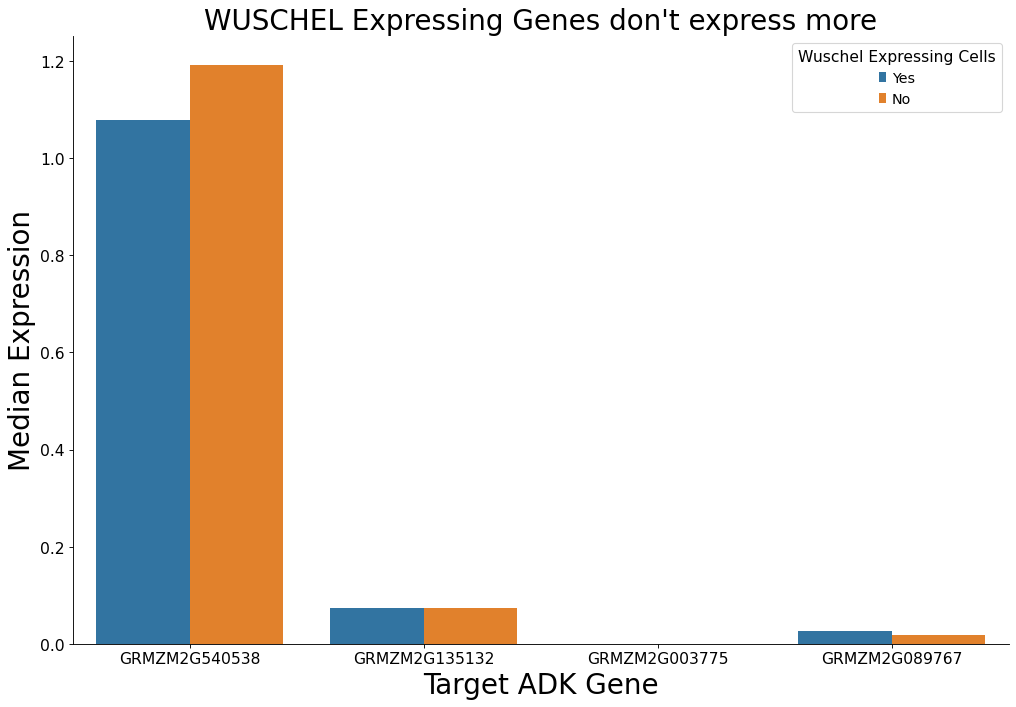

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.barplot(data =plotting_panda_adk, x = 'Gene',y = 'Mean Expression',hue = 'Wuschel Expressing Cells')

fig.patch.set_facecolor('white')

sns.despine()
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

#plt.xlim(.5,.98)
#plt.ylim(.3,1)
plt.xlabel("Target ADK Gene", fontsize = 25)
plt.ylabel("Median Expression", fontsize = 25)


plt.title("WUSCHEL Expressing Genes don't express more", fontsize = 25)
#plt.xticks(fontsize = 15, rotation = 30)
#plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = meta_cluster_labels_from_1_to_9)
#plt.legend(fontsize= 14,markerscale = 2.5, title = 'Gene', title_fontsize = 20)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)


In [ ]:
tidy_plotter = cells_without_wuschel[list_of_ADK_genes_in_maize].melt()
tidy_plotter['Wuschel Expressing Cells'] = 'No'
tidy_plotter = tidy_plotter.rename(columns = {'variable':'Gene','value':'Gene Expression'})
tidy_plotter

,Gene,Gene Expression,Wuschel Expressing Cells
0,GRMZM2G540538,1.688935,No
1,GRMZM2G540538,1.460594,No
2,GRMZM2G540538,0.990111,No
3,GRMZM2G540538,1.686014,No
4,GRMZM2G540538,1.712409,No
...,...,...,...
41763,GRMZM2G089767,0.000000,No
41764,GRMZM2G089767,0.000000,No
41765,GRMZM2G089767,0.000000,No
41766,GRMZM2G089767,0.000000,No


In [ ]:
second_plotter = maize_single_cell_wuschel_expressing_pd[list_of_ADK_genes_in_maize].melt()
second_plotter['Wuschel Expressing Cells'] = 'Yes'
second_plotter = second_plotter.rename(columns = {'variable':'Gene','value':'Gene Expression'})
second_plotter

,Gene,Gene Expression,Wuschel Expressing Cells
0,GRMZM2G540538,1.907283,Yes
1,GRMZM2G540538,1.406447,Yes
2,GRMZM2G540538,0.909653,Yes
3,GRMZM2G540538,1.617162,Yes
4,GRMZM2G540538,0.676593,Yes
...,...,...,...
431,GRMZM2G089767,0.000000,Yes
432,GRMZM2G089767,0.000000,Yes
433,GRMZM2G089767,0.000000,Yes
434,GRMZM2G089767,0.000000,Yes


In [ ]:
tidy_plotting_panda_adk = pd.concat([tidy_plotter,second_plotter])

Text(0.5, 1.0, "WUSCHEL Expressing Genes don't express more ADK")

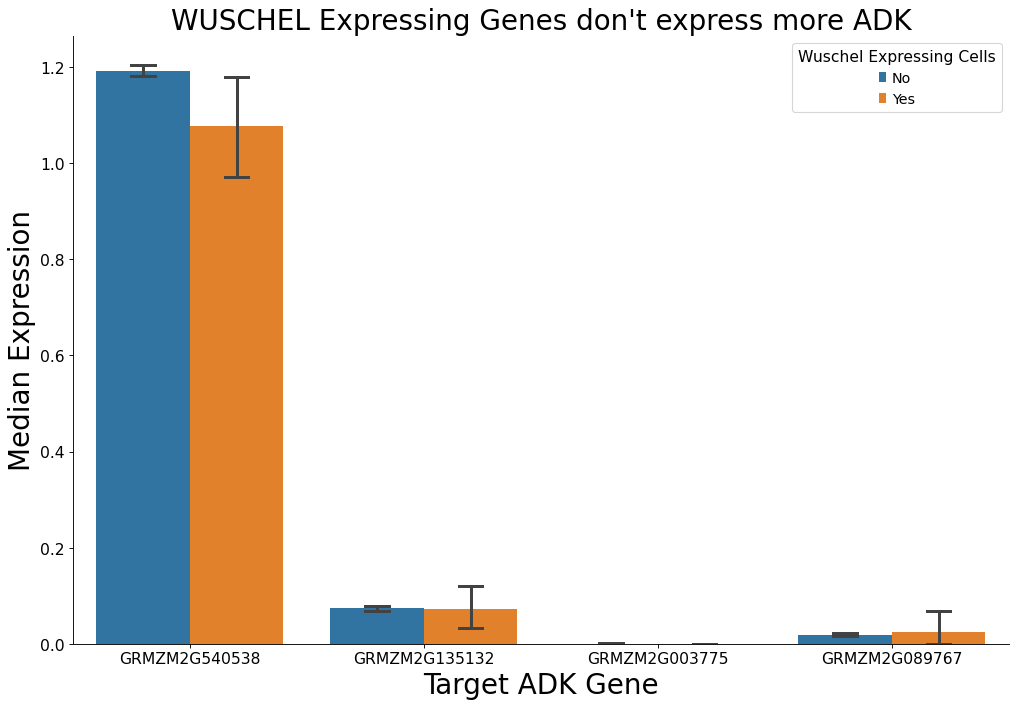

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.barplot(data =tidy_plotting_panda_adk, x = 'Gene',y = 'Gene Expression',hue = 'Wuschel Expressing Cells', ci = 99, capsize = .1)

fig.patch.set_facecolor('white')

sns.despine()
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

#plt.xlim(.5,.98)
#plt.ylim(.3,1)
plt.xlabel("Target ADK Gene", fontsize = 25)
plt.ylabel("Median Expression", fontsize = 25)


plt.title("WUSCHEL Expressing Genes don't express more ADK", fontsize = 25)
#plt.xticks(fontsize = 15, rotation = 30)
#plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = meta_cluster_labels_from_1_to_9)
#plt.legend(fontsize= 14,markerscale = 2.5, title = 'Gene', title_fontsize = 20)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)

In [ ]:
tidy_plotter = cells_without_wuschel[list_of_PFKB_genes_in_maize].melt()
tidy_plotter['Wuschel Expressing Cells'] = 'No'
tidy_plotter = tidy_plotter.rename(columns = {'variable':'Gene','value':'Gene Expression'})
tidy_plotter
second_plotter = maize_single_cell_wuschel_expressing_pd[list_of_PFKB_genes_in_maize].melt()
second_plotter['Wuschel Expressing Cells'] = 'Yes'
second_plotter = second_plotter.rename(columns = {'variable':'Gene','value':'Gene Expression'})
second_plotter

,Gene,Gene Expression,Wuschel Expressing Cells
0,GRMZM2G051842,0.000000,Yes
1,GRMZM2G051842,1.406447,Yes
2,GRMZM2G051842,0.554879,Yes
3,GRMZM2G051842,2.205804,Yes
4,GRMZM2G051842,0.676593,Yes
...,...,...,...
758,GRMZM2G132623,3.068230,Yes
759,GRMZM2G132623,3.111591,Yes
760,GRMZM2G132623,3.445875,Yes
761,GRMZM2G132623,3.156612,Yes


In [ ]:
tidy_plotting_panda_adk = pd.concat([tidy_plotter,second_plotter])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'GRMZM2G051842'),
  Text(1, 0, 'GRMZM2G171400'),
  Text(2, 0, 'GRMZM2G007630'),
  Text(3, 0, 'GRMZM2G178346'),
  Text(4, 0, 'GRMZM2G121128'),
  Text(5, 0, 'GRMZM2G132607'),
  Text(6, 0, 'GRMZM2G132623')])

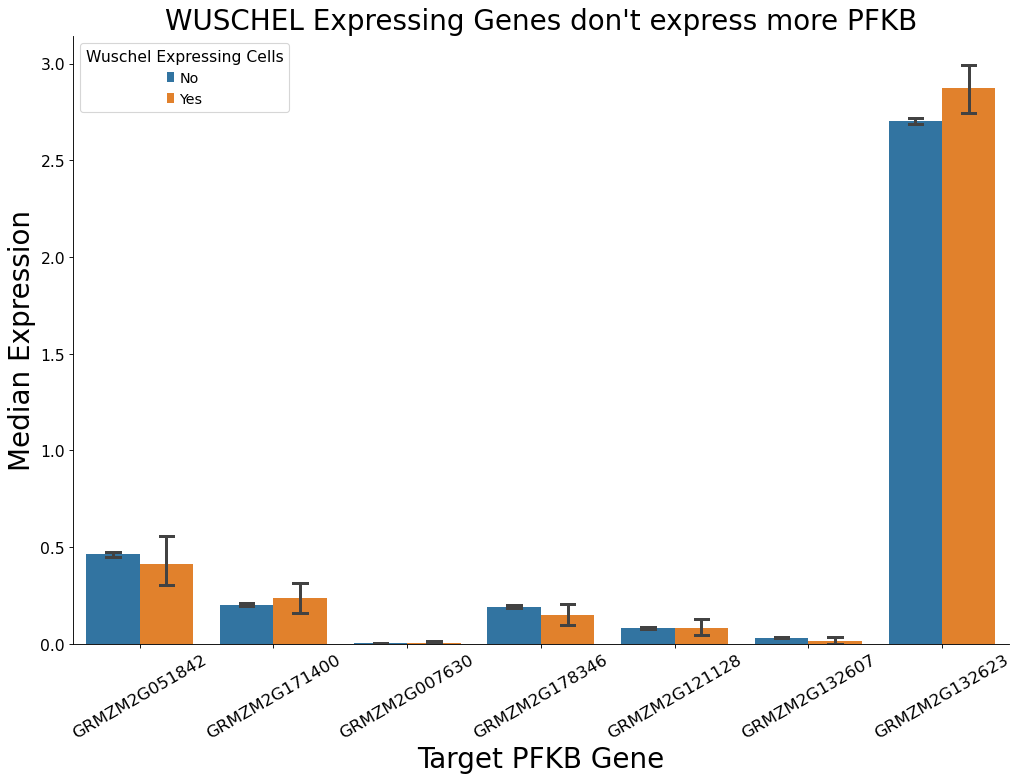

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.barplot(data =tidy_plotting_panda_adk, x = 'Gene',y = 'Gene Expression',hue = 'Wuschel Expressing Cells', ci = 99, capsize= .1)

fig.patch.set_facecolor('white')

sns.despine()
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

#plt.xlim(.5,.98)
#plt.ylim(.3,1)
plt.xlabel("Target PFKB Gene", fontsize = 25)
plt.ylabel("Median Expression", fontsize = 25)


plt.title("WUSCHEL Expressing Genes don't express more PFKB", fontsize = 25)
plt.xticks(fontsize = 15, rotation = 30)
#plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = meta_cluster_labels_from_1_to_9)
#plt.legend(fontsize= 14,markerscale = 2.5, title = 'Gene', title_fontsize = 20)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)

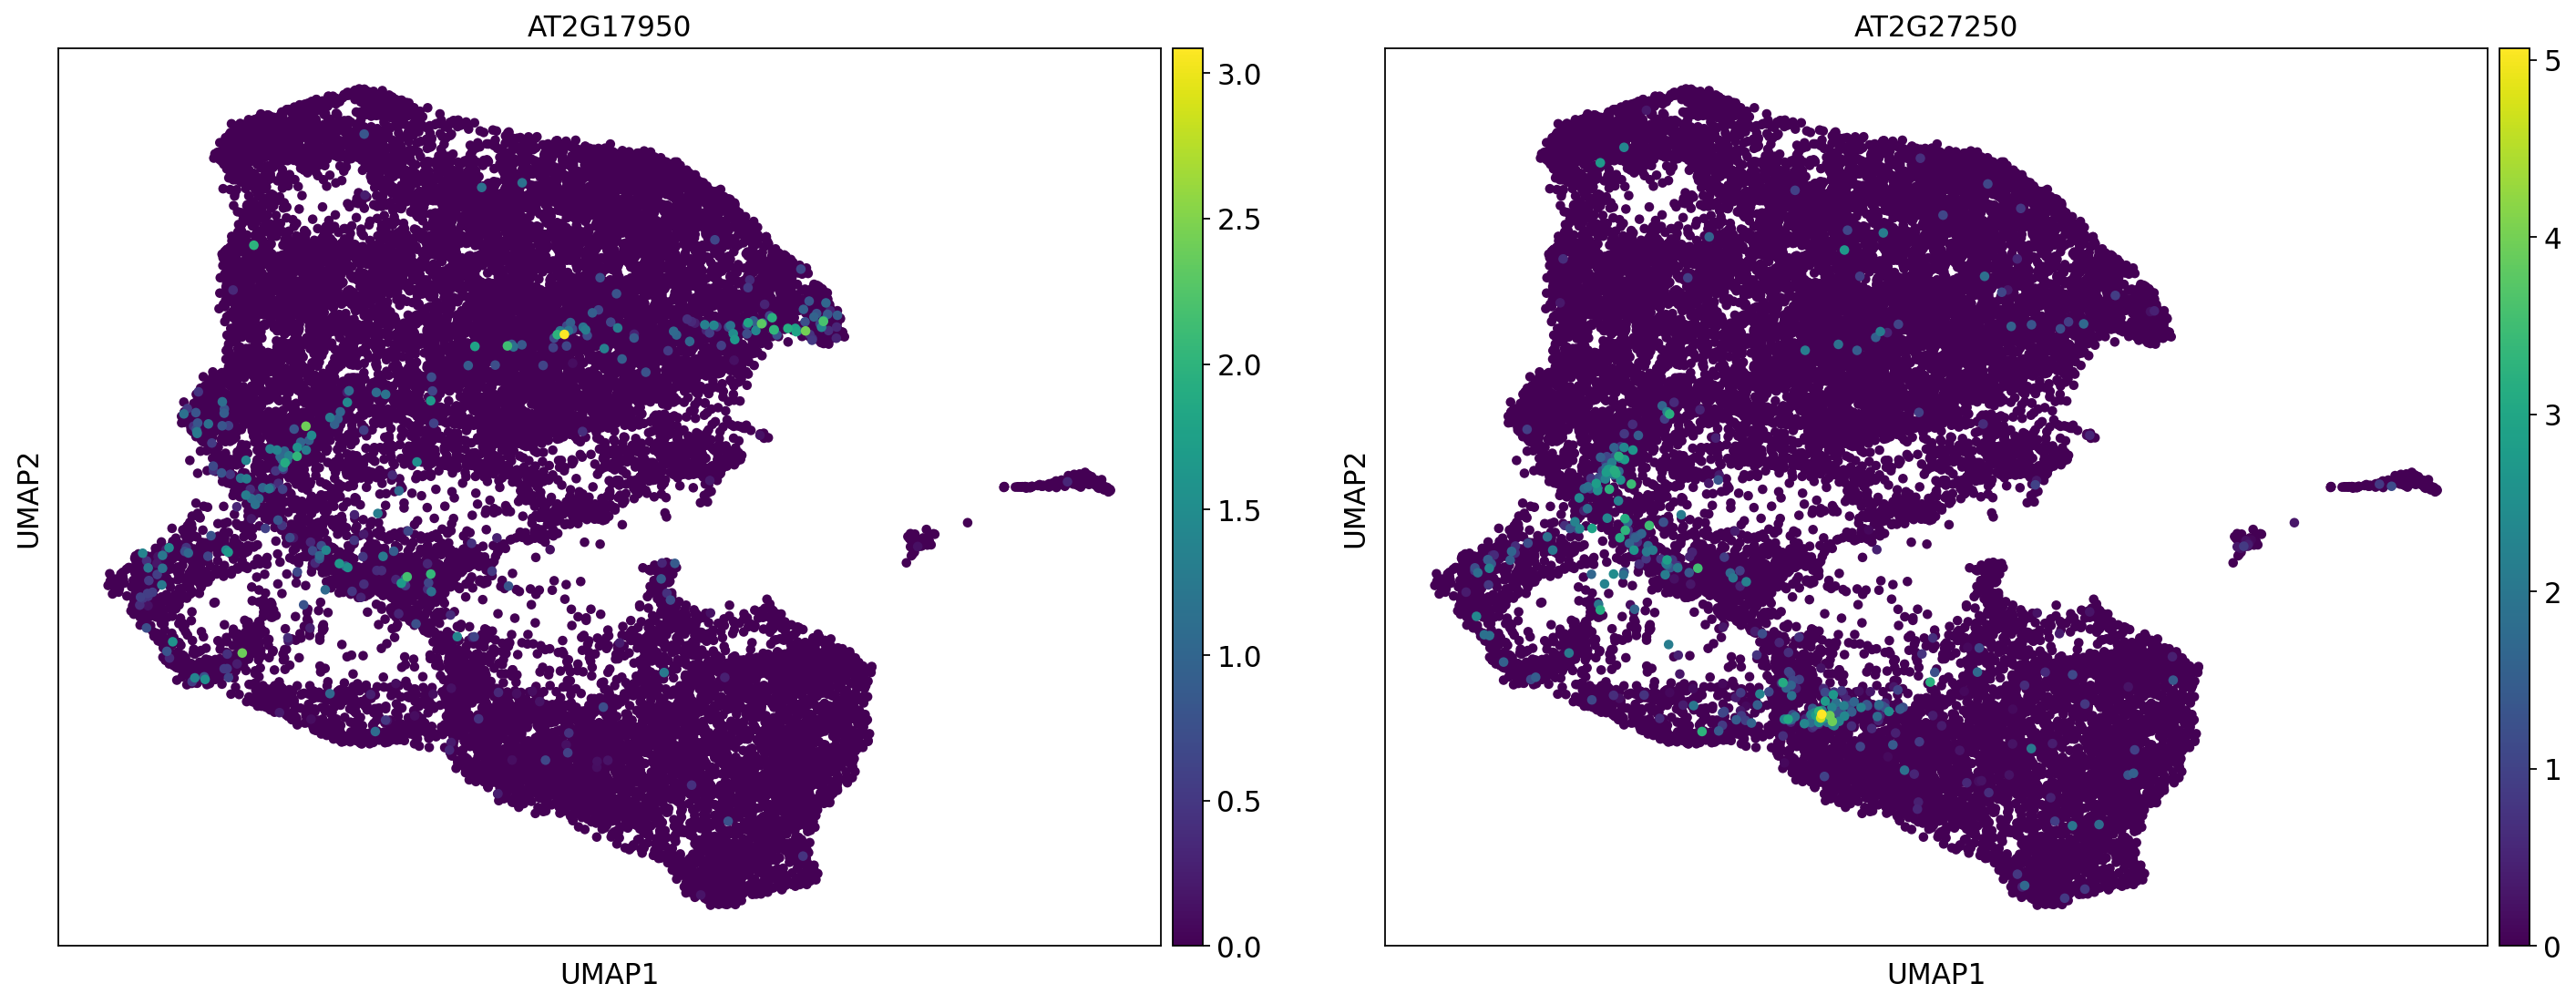

In [ ]:
sc.pl.umap(arabi_single_cell, color=['AT2G17950','AT2G27250'], use_raw= False, s = 90) ### Wuschel, CLevata 3

In [ ]:
arabi_single_cell_trimmed_to_wuschel_expressing_genes = arabi_single_cell[(arabi_single_cell[:,'AT2G17950'].X>0), : ]
arabi_single_cell_non_wuschel_expressing_cells = arabi_single_cell[(arabi_single_cell[:,'AT2G17950'].X==0), :]

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
arabi_single_cell_wuschel_expressing_pd = pd.DataFrame(data = arabi_single_cell_trimmed_to_wuschel_expressing_genes.X.todense(), columns = arabi_single_cell_trimmed_to_wuschel_expressing_genes.var.index, index = arabi_single_cell_trimmed_to_wuschel_expressing_genes.obs.index)
arabi_single_cell_wuschel_expressing_pd

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,AT5G09475,AT5G65800,AT5G66390,AT5G09665,AT5G09775,AT5G67060,ATCG00830,ATCG00920,ATCG01000,ATMG00560
AAAGGATAGTCAGGGT-1_1,0.0,0.000000,0.0,0.000000,0.475368,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGGGCGTGTCTAAC-1_1,0.0,0.000000,0.0,0.000000,1.510271,0.0,0.000000,0.0,0.000000,1.510271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCATGGTTGCCAAT-1_1,0.0,0.229670,0.0,0.327343,0.643771,0.0,0.000000,0.0,0.000000,0.327343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCTGAAGTATCCTG-1_1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.812252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACGGGACAGCCGTTG-1_1,0.0,0.000000,0.0,0.000000,1.010743,0.0,0.000000,0.0,0.000000,1.503028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCCGTGAGCCAACCC-1_2,0.0,0.413100,0.0,0.227731,1.194447,0.0,0.227731,0.0,0.227731,0.929991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTCCTAAAGCTAATCC-1_2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGGTTTGTGGAGAAA-1_2,0.0,0.487269,0.0,0.487269,0.000000,0.0,0.487269,0.0,0.000000,0.813473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGGTTTTCGAATGCT-1_2,0.0,0.000000,0.0,0.000000,0.634195,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
arabi_single_cellwuschel_expressing_cells_correlation = arabi_single_cell_wuschel_expressing_pd.corr(method = 'spearman')
arabi_tester_keep_seperate = arabi_single_cellwuschel_expressing_cells_correlation
arabi_single_cellwuschel_expressing_cells_correlation = arabi_single_cellwuschel_expressing_cells_correlation.dropna(axis = 0, how = 'all')
arabi_single_cellwuschel_expressing_cells_correlation = arabi_single_cellwuschel_expressing_cells_correlation.dropna(axis = 1, how = 'all')
arabi_ranked_columns_wuschel = arabi_single_cellwuschel_expressing_cells_correlation.rank()
arabi_ranked_columns_wuschel

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,AT5G05120,AT5G02105,AT5G24480,AT5G26930,AT5G40680,AT5G42567,AT5G43000,AT5G55875,AT5G61495,AT5G67060
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,20242.0,4121.0,7030.0,1176.0,19225.5,6655.0,864.0,5464.0,1307.0,5085.0,...,9139.0,3613.5,4573.0,2746.5,19782.0,7097.5,6309.5,4191.0,3400.0,2804.0
AT1G01020,8537.0,20242.0,16535.0,14170.0,12986.5,19757.0,8161.0,16960.0,14922.0,18770.0,...,18421.5,13682.5,15838.0,14593.0,14410.5,1637.0,1320.5,17250.0,16086.0,12470.5
AT1G01040,13923.0,17801.0,20242.0,18727.0,17985.0,18025.0,9351.0,9955.0,10684.0,16767.0,...,4472.5,992.0,15082.0,575.0,1792.5,18736.0,18873.0,16534.0,16171.0,14279.0
AT1G01050,2182.0,10549.0,14382.0,20242.0,11225.0,10580.0,16974.0,5842.0,17841.0,9286.0,...,210.0,11324.0,1269.0,9700.0,2765.0,15599.0,1404.0,16037.0,12738.0,10998.0
AT1G03997,18547.0,4971.0,10002.0,4032.0,20228.0,1990.5,2967.5,7467.0,8471.0,6778.0,...,16003.0,9946.5,11741.5,9002.0,11764.0,13921.5,12974.5,10540.0,9660.5,8860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G42567,4437.5,1169.0,8747.5,6410.5,10226.0,1990.5,2967.5,4576.5,10789.5,1726.0,...,16003.0,9946.5,11741.5,9002.0,11764.0,20239.5,12974.5,10540.0,9660.5,8860.0
AT5G43000,4437.5,1169.0,9894.5,1069.5,10226.0,1990.5,18141.5,6391.5,9036.5,1726.0,...,16003.0,9946.5,11741.5,9002.0,11764.0,13921.5,20237.5,10540.0,9660.5,8860.0
AT5G55875,4437.5,9907.0,6660.0,11362.0,10226.0,1990.5,17261.0,2498.0,5727.0,1726.0,...,16003.0,9946.5,11741.5,9002.0,11764.0,13921.5,12974.5,20237.0,9660.5,8860.0


In [ ]:
arabi_double_ranked_wuschel = arabi_ranked_columns_wuschel.rank(axis = 1)
arabi_double_ranked_wuschel
arabi_normalized_wuschel = arabi_double_ranked_wuschel/20242

arabi_wuschel_corr_results = arabi_normalized_wuschel.loc[arabi_normalized_wuschel.index =='AT2G17950'].squeeze()

In [ ]:
#arabi_wuschel_corr_results.to_csv("/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_wuschel_only_wuschel_correlation.csv")

In [ ]:
#arabi_normalized_wuschel.to_csv("/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_wuschel_correlation.csv")

In [ ]:
arabidopsis_adk_genes = ['AT3G09820','AT5G03300']
arabidopsis_PFKB_genes = ['AT1G19600','AT1G17160','AT4G27600','AT5G43910','AT4G28706']

In [ ]:
arabi_wuschel_corr_results.value_counts()

0.251828    10194
0.530234     1077
0.571460      592
0.594457      339
0.609426      267
            ...  
0.904901        1
0.952080        1
0.925551        1
0.888104        1
0.969716        1
Name: AT2G17950, Length: 2746, dtype: int64

In [ ]:
arabi_wuschel_corr_results[arabidopsis_adk_genes]

_index
AT3G09820    0.800983
AT5G03300    0.609426
Name: AT2G17950, dtype: float64

In [ ]:
arabi_wuschel_corr_results[arabidopsis_PFKB_genes]

_index
AT1G19600    0.251828
AT1G17160    0.609426
AT4G27600    0.251828
AT5G43910    0.251828
AT4G28706    0.251828
Name: AT2G17950, dtype: float64

In [ ]:
arabi_all_cells_cells_correlation = sparse_corr(arabi_single_cell.X)
arabi_all_cells_cells_correlation = pd.DataFrame(data = arabi_all_cells_cells_correlation, columns = arabi_single_cell.var.index, index = arabi_single_cell.var.index)
arabi_all_cells_cells_correlation


_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,AT5G09475,AT5G65800,AT5G66390,AT5G09665,AT5G09775,AT5G67060,ATCG00830,ATCG00920,ATCG01000,ATMG00560
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,1.000000,-0.006949,0.060596,0.007819,-0.035520,-0.001776,-0.025327,0.019859,-0.016033,-0.013612,...,-0.000039,-0.001266,-0.001864,-0.002506,-0.001770,-0.001911,-0.001556,-0.002109,-0.001708,-0.001509
AT1G01020,-0.006949,1.000000,-0.001789,0.023535,0.043745,-0.002065,0.020341,-0.005405,0.042627,0.038192,...,-0.002106,-0.002437,-0.003215,0.016085,-0.000971,0.001655,-0.002996,0.008151,-0.003288,-0.002905
AT1G01030,0.060596,-0.001789,1.000000,-0.002321,-0.014772,0.006893,-0.008220,-0.001380,-0.004589,0.008389,...,-0.000753,-0.000622,-0.000916,-0.001232,-0.000870,-0.000939,-0.000765,-0.001037,-0.000839,-0.000742
AT1G01040,0.007819,0.023535,-0.002321,1.000000,0.040939,-0.002756,0.039778,-0.004902,0.011662,0.031563,...,-0.001805,-0.002210,-0.002869,0.004610,-0.001834,0.003496,0.034143,0.004155,-0.002982,0.020451
AT1G01050,-0.035520,0.043745,-0.014772,0.040939,1.000000,0.008155,0.055960,0.012668,0.050795,0.101943,...,-0.004269,-0.005005,-0.007172,0.011377,0.002281,0.002532,-0.004700,0.005683,-0.003510,-0.005968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67060,-0.001911,0.001655,-0.000939,0.003496,0.002532,-0.000126,0.000920,-0.000166,0.003033,0.007832,...,-0.000090,-0.000075,-0.000110,-0.000148,-0.000104,1.000000,-0.000092,-0.000124,-0.000101,-0.000089
ATCG00830,-0.001556,-0.002996,-0.000765,0.034143,-0.004700,-0.000103,-0.002229,-0.000135,-0.001420,-0.005835,...,-0.000074,-0.000061,-0.000090,-0.000120,-0.000085,-0.000092,1.000000,-0.000101,-0.000082,-0.000073
ATCG00920,-0.002109,0.008151,-0.001037,0.004155,0.005683,-0.000139,-0.000712,-0.000183,0.006048,0.000485,...,-0.000100,-0.000082,-0.000121,-0.000163,-0.000115,-0.000124,-0.000101,1.000000,-0.000111,-0.000098


In [ ]:
arabi_all_cells_cells_correlation = arabi_all_cells_cells_correlation.replace(0,np.NaN)
arabi_all_cells_cells_correlation

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,AT5G09475,AT5G65800,AT5G66390,AT5G09665,AT5G09775,AT5G67060,ATCG00830,ATCG00920,ATCG01000,ATMG00560
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,1.000000,-0.006949,0.060596,0.007819,-0.035520,-0.001776,-0.025327,0.019859,-0.016033,-0.013612,...,-0.000039,-0.001266,-0.001864,-0.002506,-0.001770,-0.001911,-0.001556,-0.002109,-0.001708,-0.001509
AT1G01020,-0.006949,1.000000,-0.001789,0.023535,0.043745,-0.002065,0.020341,-0.005405,0.042627,0.038192,...,-0.002106,-0.002437,-0.003215,0.016085,-0.000971,0.001655,-0.002996,0.008151,-0.003288,-0.002905
AT1G01030,0.060596,-0.001789,1.000000,-0.002321,-0.014772,0.006893,-0.008220,-0.001380,-0.004589,0.008389,...,-0.000753,-0.000622,-0.000916,-0.001232,-0.000870,-0.000939,-0.000765,-0.001037,-0.000839,-0.000742
AT1G01040,0.007819,0.023535,-0.002321,1.000000,0.040939,-0.002756,0.039778,-0.004902,0.011662,0.031563,...,-0.001805,-0.002210,-0.002869,0.004610,-0.001834,0.003496,0.034143,0.004155,-0.002982,0.020451
AT1G01050,-0.035520,0.043745,-0.014772,0.040939,1.000000,0.008155,0.055960,0.012668,0.050795,0.101943,...,-0.004269,-0.005005,-0.007172,0.011377,0.002281,0.002532,-0.004700,0.005683,-0.003510,-0.005968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67060,-0.001911,0.001655,-0.000939,0.003496,0.002532,-0.000126,0.000920,-0.000166,0.003033,0.007832,...,-0.000090,-0.000075,-0.000110,-0.000148,-0.000104,1.000000,-0.000092,-0.000124,-0.000101,-0.000089
ATCG00830,-0.001556,-0.002996,-0.000765,0.034143,-0.004700,-0.000103,-0.002229,-0.000135,-0.001420,-0.005835,...,-0.000074,-0.000061,-0.000090,-0.000120,-0.000085,-0.000092,1.000000,-0.000101,-0.000082,-0.000073
ATCG00920,-0.002109,0.008151,-0.001037,0.004155,0.005683,-0.000139,-0.000712,-0.000183,0.006048,0.000485,...,-0.000100,-0.000082,-0.000121,-0.000163,-0.000115,-0.000124,-0.000101,1.000000,-0.000111,-0.000098


In [ ]:
arabi_all_cells_cells_correlation = arabi_all_cells_cells_correlation.dropna(axis = 0, how = 'all')
arabi_all_cells_cells_correlation = arabi_all_cells_cells_correlation.dropna(axis = 1, how = 'all')
arabi_ranked_columns_all_cells = arabi_all_cells_cells_correlation.rank()
arabi_ranked_columns_all_cells

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,AT5G09475,AT5G65800,AT5G66390,AT5G09665,AT5G09775,AT5G67060,ATCG00830,ATCG00920,ATCG01000,ATMG00560
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,23292.0,1940.0,23031.0,10943.0,615.0,8042.0,744.0,22840.0,862.0,1076.0,...,19544.0,11115.0,8958.0,7037.0,4542.0,1684.0,9479.0,2397.0,8708.0,7876.0
AT1G01020,7860.0,23292.0,11400.0,19064.0,17223.0,6865.0,13773.0,3435.0,21606.0,15092.0,...,5011.0,5065.0,4332.0,22722.0,8441.0,14794.0,3681.0,21248.0,3208.0,2529.0
AT1G01030,22673.0,5104.0,23292.0,4496.0,1533.0,21543.0,2305.0,13217.0,3099.0,8147.0,...,12025.0,14826.0,13001.0,11031.0,9016.0,4833.0,13503.0,5677.0,12517.0,12156.0
AT1G01040,17871.0,16551.0,10447.0,23292.0,16725.0,4524.0,18914.0,4229.0,13240.0,13675.0,...,6369.0,5962.0,5229.0,20478.0,4260.0,17106.0,23206.0,18130.0,3947.0,22812.0
AT1G01050,750.0,21315.0,1778.0,22558.0,23292.0,21787.0,21414.0,22565.0,22269.0,22228.0,...,879.0,797.0,673.0,22202.0,18984.0,15991.0,1158.0,19622.0,2719.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67060,12696.0,7038.0,13381.0,8330.0,6234.0,18094.0,7273.0,19782.0,9231.0,7974.0,...,18723.0,21004.0,19269.0,17702.0,16291.0,23292.0,20017.0,12551.0,18869.0,18932.0
ATCG00830,13330.0,4151.0,13906.0,21784.0,3557.0,18564.0,5470.0,20236.0,6432.0,2657.0,...,19187.0,21452.0,19724.0,18157.0,16770.0,12152.0,23292.0,13024.0,19324.0,19391.0
ATCG00920,12416.0,10169.0,13122.0,8726.0,7444.0,17864.0,6516.0,19566.0,10673.0,5174.0,...,18502.0,20791.0,19054.0,17487.0,16071.0,11453.0,19799.0,23292.0,18649.0,18707.0


In [ ]:
arabi_double_ranked_all_cells = arabi_ranked_columns_all_cells.rank(axis = 1)
arabi_double_ranked_all_cells 

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,AT5G09475,AT5G65800,AT5G66390,AT5G09665,AT5G09775,AT5G67060,ATCG00830,ATCG00920,ATCG01000,ATMG00560
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,23292.0,7568.5,23177.5,15886.0,1011.5,14026.0,1751.0,23016.5,2601.0,4177.5,...,19747.0,15977.0,14709.0,13178.0,10990.0,6895.0,15074.5,8501.0,14561.0,13885.5
AT1G01020,4900.0,23292.0,6913.0,18901.0,14922.0,4421.5,9116.0,2036.0,22498.5,10922.5,...,3276.0,3311.0,2783.0,23146.0,5209.0,10457.5,2242.5,22182.5,1856.0,1287.0
AT1G01030,22872.5,9499.5,23292.0,8867.0,2879.5,22123.0,5428.5,17713.5,6986.0,13051.5,...,16889.0,18582.5,17578.5,16112.0,14038.0,9208.5,17876.0,10159.5,17260.5,16989.0
AT1G01040,18914.5,17017.0,7013.0,23292.0,17313.0,2924.0,20210.0,2660.0,10951.5,11794.0,...,4123.5,3868.0,3411.0,21795.0,2692.5,17884.0,23286.5,19274.5,2457.5,23157.0
AT1G01050,1008.5,16903.0,2298.0,21946.5,23292.0,18738.5,17283.5,21962.0,20805.5,20629.5,...,1224.0,1075.5,876.0,20512.5,10990.0,7519.0,1646.0,12132.0,2876.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67060,15779.0,4994.5,16739.0,8488.0,3140.0,22170.0,5631.5,22873.0,10494.5,7570.5,...,22478.0,23106.0,22720.5,21935.0,20706.5,23292.0,22926.0,15583.5,22534.0,22566.0
ATCG00830,17166.5,2676.5,17822.0,23205.0,1370.5,22218.0,6727.0,22930.0,9144.0,287.5,...,22539.0,23161.5,22779.0,21983.0,20893.0,15836.0,23292.0,16801.0,22598.5,22631.0
ATCG00920,15589.0,12382.0,16568.0,9869.0,6975.5,21975.5,4763.0,22785.0,13122.0,2091.0,...,22317.0,23072.0,22606.0,21715.5,20418.5,14230.5,22843.0,23292.0,22389.0,22426.0


In [ ]:
arabi_normalized_all_cells = arabi_double_ranked_all_cells/20242
arabi_normalized_all_cells

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,AT5G09475,AT5G65800,AT5G66390,AT5G09665,AT5G09775,AT5G67060,ATCG00830,ATCG00920,ATCG01000,ATMG00560
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,1.150677,0.373901,1.145020,0.784804,0.049970,0.692916,0.086503,1.137066,0.128495,0.206378,...,0.975546,0.789299,0.726657,0.651023,0.542931,0.340628,0.744714,0.419968,0.719346,0.685975
AT1G01020,0.242071,1.150677,0.341518,0.933752,0.737180,0.218432,0.450351,0.100583,1.111476,0.539596,...,0.161842,0.163571,0.137486,1.143464,0.257336,0.516624,0.110785,1.095865,0.091691,0.063581
AT1G01030,1.129953,0.469297,1.150677,0.438050,0.142254,1.092926,0.268180,0.875086,0.345124,0.644773,...,0.834354,0.918017,0.868417,0.795969,0.693509,0.454920,0.883114,0.501902,0.852707,0.839295
AT1G01040,0.934419,0.840678,0.346458,1.150677,0.855301,0.144452,0.998419,0.131410,0.541029,0.582650,...,0.203710,0.191088,0.168511,1.076722,0.133016,0.883510,1.150405,0.952203,0.121406,1.144008
AT1G01050,0.049822,0.835046,0.113526,1.084206,1.150677,0.925724,0.853843,1.084972,1.027838,1.019143,...,0.060468,0.053132,0.043276,1.013363,0.542931,0.371455,0.081316,0.599348,0.142081,0.007015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67060,0.779518,0.246739,0.826944,0.419326,0.155123,1.095248,0.278209,1.129977,0.518452,0.374000,...,1.110463,1.141488,1.122443,1.083638,1.022947,1.150677,1.132596,0.769860,1.113230,1.114811
ATCG00830,0.848063,0.132225,0.880447,1.146379,0.067706,1.097619,0.332329,1.132793,0.451734,0.014203,...,1.113477,1.144230,1.125333,1.086009,1.032161,0.782334,1.150677,0.830007,1.116416,1.118022
ATCG00920,0.770131,0.611698,0.818496,0.487551,0.344605,1.085639,0.235303,1.125630,0.648256,0.103300,...,1.102510,1.139808,1.116787,1.072794,1.008719,0.703018,1.128495,1.150677,1.106067,1.107894


In [ ]:
arabi_all_cells_results = arabi_normalized_all_cells.loc[arabi_normalized_all_cells.index =='AT2G17950'].squeeze()

In [ ]:
#arabi_normalized_all_cells.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_normalized_all_cells_correlation.csv')

In [ ]:
arabi_clev_results = arabi_normalized_all_cells.loc[arabi_normalized_all_cells.index =='AT2G27250'].squeeze()

In [ ]:
arabi_single_cell_trimmed_to_clevata_expressing_genes = arabi_single_cell[(arabi_single_cell[:,'AT2G27250'].X>0), : ]


In [ ]:
arabi_single_cell_clevata_expressing_pd = pd.DataFrame(data = arabi_single_cell_trimmed_to_clevata_expressing_genes.X.todense(), columns = arabi_single_cell_trimmed_to_clevata_expressing_genes.var.index, index = arabi_single_cell_trimmed_to_clevata_expressing_genes.obs.index)
arabi_single_cell_clevata_expressing_pd

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01070,AT1G01080,AT1G01090,...,AT5G09475,AT5G65800,AT5G66390,AT5G09665,AT5G09775,AT5G67060,ATCG00830,ATCG00920,ATCG01000,ATMG00560
AACACACAGTACCCTA-1_1,0.000000,0.000000,0.0,0.245874,0.443066,0.0,0.000000,0.0,0.000000,0.749032,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACGGGACATGGTGGA-1_1,0.000000,0.000000,0.0,0.342950,0.597845,0.0,0.000000,0.0,0.000000,0.597845,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGAACATCAGCCTTC-1_1,0.000000,0.000000,0.0,0.000000,1.613450,0.0,0.000000,0.0,1.101957,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGACTCTCAGTCCGG-1_1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.695140,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTCGTGTATGTGTC-1_1,0.166965,0.435113,0.0,0.166965,0.310000,0.0,0.000000,0.0,0.546299,0.737296,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAACTCGGACCAC-1_2,0.000000,0.163914,0.0,0.163914,0.163914,0.0,0.163914,0.0,0.163914,0.726911,...,0.0,0.0,0.163914,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGACCCCACGAGAAC-1_2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGGTTTGTGGAGAAA-1_2,0.000000,0.487269,0.0,0.487269,0.000000,0.0,0.487269,0.0,0.000000,0.813473,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTAGTCGTTCATCTT-1_2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.715044,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
arabi_single_cellclevata_expressing_cells_correlation = arabi_single_cell_clevata_expressing_pd.corr(method = 'spearman')
arabi_single_cellclevata_expressing_cells_correlation = arabi_single_cellclevata_expressing_cells_correlation.dropna(axis = 0, how = 'all')
arabi_single_cellclevata_expressing_cells_correlation = arabi_single_cellclevata_expressing_cells_correlation.dropna(axis = 1, how = 'all')
arabi_ranked_columns_clevata = arabi_single_cellclevata_expressing_cells_correlation.rank()
arabi_ranked_columns_clevata

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01080,AT1G01090,AT1G01100,...,AT5G25160,AT5G28350,AT5G43000,AT5G06455,AT5G52045,AT5G55875,AT5G08810,AT5G08865,AT5G09045,AT5G66390
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,20694.0,4649.0,20112.5,3491.0,8512.0,19797.0,14073.0,4715.0,9404.0,9318.0,...,5435.0,20455.5,8188.0,4259.5,5221.5,5700.5,7044.0,4506.5,11555.5,6755.0
AT1G01020,7436.0,20694.0,9137.0,19218.0,20458.0,12922.0,4289.0,7948.0,8003.0,18446.0,...,12514.5,14310.0,769.0,15174.0,212.5,17308.0,14415.0,17188.0,18992.5,14142.0
AT1G01030,16779.5,1040.5,20694.0,8735.0,529.0,7772.0,4482.0,821.0,1467.0,1820.0,...,9332.0,9827.0,12291.0,8052.5,9046.5,9715.0,11131.5,8404.0,15589.5,10830.5
AT1G01040,6949.0,19756.0,19383.0,20694.0,15273.0,18705.0,20155.0,17126.0,15439.0,13761.0,...,16970.0,17820.5,19100.0,14182.0,16718.0,16945.0,16939.5,17762.0,4428.0,16642.0
AT1G01050,9493.0,19803.0,3742.0,10957.0,20694.0,9964.0,3176.0,12878.0,1555.0,19578.0,...,14933.0,14835.0,6057.0,10919.0,11166.0,16643.0,13415.0,14664.0,568.5,4383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G55875,2838.0,6182.0,12146.0,4748.0,7073.0,8842.0,1103.5,10627.0,1120.0,7840.0,...,10346.0,10857.0,13320.5,9063.0,10062.0,20690.0,12157.0,9419.5,16594.5,11838.0
AT5G08810,2838.0,2855.5,12146.0,4618.5,2422.5,8842.0,1103.5,1556.5,1976.5,9240.5,...,10346.0,10857.0,13320.5,9063.0,10062.0,10752.5,20691.5,9419.5,16594.5,11838.0
AT5G08865,2838.0,6740.0,12146.0,6337.0,6076.0,8842.0,8149.0,12208.0,4817.0,16062.0,...,10346.0,10857.0,13320.5,9063.0,10062.0,10752.5,12157.0,20691.0,16594.5,11838.0


In [ ]:
arabi_double_ranked_clevata = arabi_ranked_columns_clevata.rank(axis = 1)
arabi_double_ranked_clevata
arabi_normalized_clevata = arabi_double_ranked_clevata/20694


In [ ]:
arabi_normalized_clevata

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G03997,AT1G01060,AT1G01080,AT1G01090,AT1G01100,...,AT5G25160,AT5G28350,AT5G43000,AT5G06455,AT5G52045,AT5G55875,AT5G08810,AT5G08865,AT5G09045,AT5G66390
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,1.000000,0.191360,0.972311,0.116145,0.478641,0.957717,0.768242,0.195709,0.535977,0.530468,...,0.249952,0.992389,0.456195,0.164081,0.233667,0.270610,0.377138,0.181115,0.656326,0.351889
AT1G01020,0.147700,1.000000,0.234078,0.933338,0.992075,0.497246,0.056490,0.171185,0.173722,0.891684,...,0.465715,0.605779,0.011839,0.670847,0.003069,0.819537,0.612738,0.811419,0.921668,0.593046
AT1G01030,0.968928,0.227240,1.000000,0.822630,0.113463,0.784285,0.612955,0.181623,0.302092,0.357712,...,0.847299,0.863076,0.920798,0.795810,0.836740,0.860056,0.898884,0.810428,0.959505,0.889147
AT1G01040,0.097516,0.952643,0.927129,1.000000,0.578259,0.876897,0.975403,0.742534,0.591572,0.456654,...,0.728327,0.803107,0.906398,0.490794,0.704141,0.725669,0.724920,0.797937,0.051416,0.697497
AT1G01050,0.394390,0.985503,0.065889,0.511670,1.000000,0.431405,0.051102,0.657268,0.023630,0.980719,...,0.792742,0.787813,0.165265,0.507490,0.528076,0.879023,0.694912,0.775587,0.009181,0.088286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G55875,0.339543,0.667005,0.899874,0.554146,0.719846,0.795255,0.082584,0.860684,0.085435,0.756789,...,0.851237,0.866241,0.921185,0.803735,0.840558,0.999807,0.900213,0.817532,0.960472,0.889147
AT5G08810,0.358413,0.360491,0.920653,0.537450,0.311250,0.815647,0.118730,0.194452,0.253673,0.833237,...,0.871388,0.887479,0.939548,0.825143,0.860757,0.884193,0.999879,0.839180,0.971731,0.910602
AT5G08865,0.266937,0.665289,0.890741,0.636924,0.615831,0.774790,0.744660,0.893037,0.496907,0.951773,...,0.836160,0.853967,0.915000,0.784503,0.823741,0.850343,0.891055,0.999855,0.956896,0.879748


In [ ]:
arabi_clevata_corr_results = arabi_normalized_clevata.loc[arabi_normalized_clevata.index =='AT2G27250'].squeeze()

In [ ]:
#arabi_clevata_corr_results.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_clevata_only_clevata_cells_correlation.csv')

In [ ]:
#arabi_normalized_clevata.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_clevata_cells_correlation.csv')

In [ ]:
arabi_all_cells_results[arabidopsis_adk_genes]

_index
AT3G09820    0.469988
AT5G03300    0.544437
Name: AT2G17950, dtype: float64

In [ ]:
arabi_all_cells_results[arabidopsis_PFKB_genes]

_index
AT1G19600    0.318620
AT1G17160    0.671055
AT4G27600    0.489650
AT5G43910    0.294388
AT4G28706    0.181306
Name: AT2G17950, dtype: float64

In [ ]:
arabi_clev_results[arabidopsis_adk_genes]

_index
AT3G09820    0.628693
AT5G03300    0.737304
Name: AT2G27250, dtype: float64

In [ ]:
arabi_clev_results[arabidopsis_PFKB_genes]

_index
AT1G19600    0.179034
AT1G17160    0.647515
AT4G27600    0.206526
AT5G43910    0.237896
AT4G28706    0.364638
Name: AT2G27250, dtype: float64